# Clustering
Clustering is an unsupervised learning method that allows us to group set of objects based on similar characteristics. <br> One of the most common clustering methods is K-means algorithm. 

### K-means
- The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster
- The 'means' in the K-means refers to averaging of the data; that is, finding the centroid
- k-means use distance-based measurements to determine the similarity between data points

### Project introduction
The Iris dataset contains the data for 50 flowers from each of the 3 species - Setosa, Versicolor and Virginica. The data gives the measurements in centimeters of the variables sepal length and width and petal length and width for each of the flowers.

Goal of the study is to perform exploratory analysis on the data and build a K-means clustering model to cluster them into groups.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

![](iris.png)

source: https://www.w3resource.com/machine-learning/scikit-learn/iris/index.php

In [2]:
# print all the outputs in a cell
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

###  Loading the Iris dataset from Scikit-learn

In [83]:
# import load_iris function from scikit-learn datasets module
from sklearn.datasets import load_iris 

In [84]:
iris = load_iris()

In [85]:
type(iris)

sklearn.utils.Bunch

### Exploratory Data Analysis

In [86]:
iris # iris is a dictionary-like object

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

### explore the attributes:
- 'data': the data to learn
- 'feature_names': the meaning of the features
- 'target':the classification labels
- 'target_names': the meaning of the labels
- 'DESCR': the full description of the dataset
- 'filename':the physical location of iris csv dataset (added in version 0.20).

In [87]:
type(iris["data"]) 

numpy.ndarray

In [88]:
iris["data"].shape #  150 observations, 4 columns

(150, 4)

In [89]:
# print the names of the four features
print(iris["feature_names"])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [90]:
# 0 = Setosa , 1 = Versicolor, 2 = virginica
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [91]:
# print the names of the three species
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


### Create a DataFrame

In [92]:
df = pd.DataFrame(data = iris["data"], columns=iris["feature_names"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [93]:
df["target"] = iris["target"] # add the feature "target" as a new column
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Explore the Correlation of Features

There are different color provided: 
https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

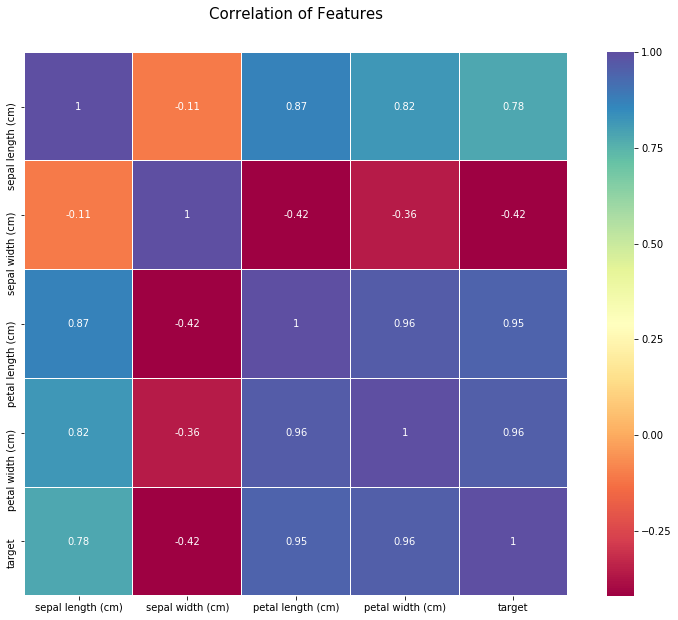

In [94]:
plt.figure(figsize=(14,10))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), cmap = "Spectral",
linewidths=0.1, square=True, linecolor='white', annot=True)

<div class="alert alert-block alert-danger">
From above, we can found that the **length** and **width** of petal are closely to **perfectly positive correlation**
</div>

## scatter plot 

Text(0.5,1,'Petal Length vs Petal Width')

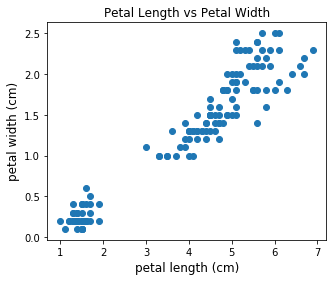

In [95]:
plt.figure(figsize=(5, 4))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('petal length (cm)', size=12)
plt.ylabel('petal width (cm)', size=12)
plt.title('Petal Length vs Petal Width')

#### Let us add some color: 
Since we already know there are three iris species, we assign three diffrent colors to each one.

Text(0,0.5,'petal width (cm)')

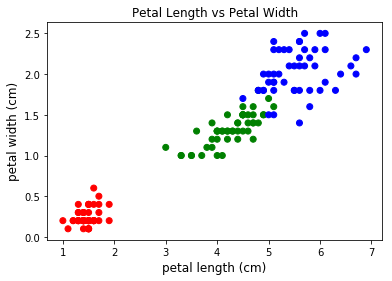

In [96]:
colors = np.array(['red', 'green', 'blue']) # Create an array of three colours, one for each species.
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=colors[df['target']])
plt.title('Petal Length vs Petal Width')
plt.xlabel('petal length (cm)', size=12)
plt.ylabel('petal width (cm)', size=12)

<div class="alert alert-block alert-danger">
**We can clearly see the grouping in the plots with the red dots is isolated, while the green and blue dots are not so clearly separable.**
</div>

Text(0,0.5,'sepal width (cm)')

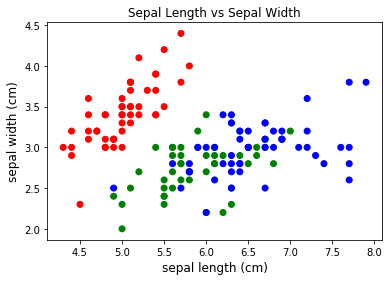

In [97]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=colors[df['target']])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('sepal length (cm)', size=12)
plt.ylabel('sepal width (cm)', size=12)

<div class="alert alert-block alert-danger">
**We can clearly see the grouping in the plots with the red dots is isolated, while the green and blue dots are not so clearly separable.**
</div>

### Split the datasets to training & testing 

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
# The ratio of training & testing is 9:1 
train_test_split(iris["data"], iris["target"], test_size=0.1) 
# Return 90% training data, 10% testing data, 90% label, 10% label 

[array([[5.6, 2.8, 4.9, 2. ],
        [4.3, 3. , 1.1, 0.1],
        [6.3, 3.3, 4.7, 1.6],
        [4.8, 3.4, 1.9, 0.2],
        [6.1, 3. , 4.6, 1.4],
        [6.1, 2.6, 5.6, 1.4],
        [7.9, 3.8, 6.4, 2. ],
        [6. , 3.4, 4.5, 1.6],
        [5.5, 4.2, 1.4, 0.2],
        [5.9, 3. , 5.1, 1.8],
        [5.9, 3.2, 4.8, 1.8],
        [7.2, 3.6, 6.1, 2.5],
        [6.4, 2.8, 5.6, 2.2],
        [5.1, 3.4, 1.5, 0.2],
        [7.2, 3. , 5.8, 1.6],
        [4.4, 3.2, 1.3, 0.2],
        [6.2, 2.8, 4.8, 1.8],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 2.8, 4.1, 1.3],
        [6.4, 3.2, 5.3, 2.3],
        [6.3, 3.4, 5.6, 2.4],
        [4.5, 2.3, 1.3, 0.3],
        [5. , 3.6, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [6.3, 2.9, 5.6, 1.8],
        [7.7, 3. , 6.1, 2.3],
        [5.2, 4.1, 1.5, 0.1],
        [6.3, 2.7, 4.9, 1.8],
        [5.2, 3.4, 1.4, 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [6.5, 3. , 5.5, 1.8],
        [5.7, 3.8, 1.7, 0.3],
        [5. , 3.3, 1.4, 0.2],
        [6

In [100]:
# Save 90% training data, 10% testing data, 90% label, 10% label to four variabels 
x_train, x_test, y_train, y_test = train_test_split(iris["data"], 
                                                    iris["target"], 
                                                    test_size=0.1)

### Training the model
- K-means

In [101]:
from sklearn.cluster import KMeans
clu = KMeans()
# clu = KMeans(n_clusters=3)

In [102]:
# Train model: Using training data without corresponding y labels
clu.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [104]:
# It will automatically choose the number of K for us 
clu.labels_ 

array([1, 1, 2, 0, 0, 0, 3, 7, 2, 2, 6, 5, 1, 0, 6, 2, 1, 1, 5, 1, 0, 2,
       2, 3, 0, 1, 7, 4, 5, 5, 7, 7, 5, 0, 0, 7, 7, 7, 6, 0, 2, 3, 1, 7,
       2, 0, 4, 5, 0, 2, 5, 4, 7, 4, 6, 5, 1, 4, 1, 5, 2, 5, 1, 6, 7, 6,
       4, 2, 5, 5, 0, 1, 7, 4, 0, 7, 2, 5, 4, 1, 5, 2, 6, 1, 2, 2, 6, 7,
       2, 4, 5, 7, 0, 0, 4, 1, 2, 0, 7, 3, 1, 6, 5, 1, 5, 6, 2, 5, 1, 7,
       5, 7, 6, 5, 5, 6, 7, 0, 1, 0, 1, 1, 1, 2, 1, 7, 0, 2, 0, 7, 0, 5,
       2, 1, 6], dtype=int32)

## Measure the model

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. 


- The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar

source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

![](S1.png)

![](S2.png)

In [105]:
from sklearn.metrics import silhouette_score

In [106]:
clu = KMeans()
clu.fit(x_train) # the parameter is x_test (training data without labels)
silhouette_score(x_train, clu.labels_)

0.35610822121511626

<div class="alert alert-block alert-danger">
**As automatically grouped in K clusters without assigning the parameter K, the silhouette score above is relatively low.**
</div>

### Assigning K
If we assume that we do not have the species column to form clusters and then used it to check our model performance. <br> 

The question is which value of K we should choose? <br> 
-> Choose K which makes the Silhouette Coefficient the largest.

In [107]:
from sklearn.metrics import silhouette_score
y = []
x = []
for k in range(2, 7):
    clu = KMeans(n_clusters=k)
    clu.fit(iris["data"]) 
    x.append(k)
    y.append(silhouette_score(iris["data"], clu.labels_))
print(x)
print(y)

[2, 3, 4, 5, 6]
[0.6808136202713507, 0.5525919445213676, 0.49722797262968016, 0.4885175508538632, 0.36951627458890624]


Text(0.5,1,'Sihouette Score V.S.K')

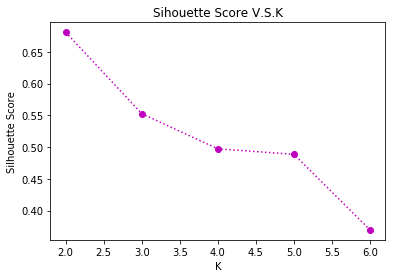

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(x, y, "mo:")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Sihouette Score V.S.K")
# plt.show()

<div class="alert alert-block alert-danger">
**It turn out to be when K equals to 2, the Sihouette Score is maximum.** <br> 
At first glance, it seems to be a little be weird since we already know there are three different species (Setosa, Versicolor and Virginica) in this dataset.  <br> 
<br> 
When we think further however, this result totally makes sense. <br> 
Judging from the appearance, Versicolor and Virginica are similar.<br>  In addition, from the scatter plot above, we noticed that the green and blue dots are not so clearly separable.
</div>

### Choose k = 3 and build the model again 

In [109]:
clu2 = KMeans(n_clusters = 3)
clu2.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [110]:
clu2.labels_

array([0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 2,
       2, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1,
       2, 1, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1,
       2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0,
       2, 0, 1], dtype=int32)

In [113]:
silhouette_score(x_train, clu2.labels_)

0.5513524827640219